In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import statistics

In [194]:
df = pd.read_csv('/content/country_profile_variables.csv')
df.head(10)

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99
5,Angola,MiddleAfrica,1246700,29784,23.9,96.2,117955,3.0,4714.1,6.8,...,12.4,146,46.5,34.8/1.4,3902,25,75.4/28.2,88.6/22.5,0.42,-99
6,Anguilla,Caribbean,91,15,165.7,97.6,320,2.9,21879.6,2.3,...,76.0,52,61.1,0.1/9.8,0,136,94.6/...,97.9/...,-99,-99
7,Antigua and Barbuda,Caribbean,442,102,231.8,92.3,1356,4.1,14764.5,1.9,...,65.2,55,22.3,0.5/5.8,-99,84,97.9/97.9,91.4/91.4,0.12,-99
8,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,6.0,...,69.4,256,10.0,204.0/4.7,3167,85,99.0/100.0,96.2/98.3,0.01,-99
9,Armenia,WesternAsia,29743,2930,102.9,88.8,10529,3.0,3489.1,19.0,...,58.2,114,11.7,5.5/1.8,48,46,100.0/100.0,96.2/78.2,3.17,-99


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     229 non-null    object 
 1   Region                                                      229 non-null    object 
 2   Surface area (km2)                                          229 non-null    object 
 3   Population in thousands (2017)                              229 non-null    int64  
 4   Population density (per km2, 2017)                          229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                               229 non-null    float64
 6   GDP: Gross domestic product (million current US$)           229 non-null    int64  
 7   GDP growth rate (annual %, const. 2005 prices)              229 non-null    object 
 8   

In [86]:
df.isnull().sum()

,0
country,0
Region,0
Surface area (km2),0
Population in thousands (2017),0
"Population density (per km2, 2017)",0
"Sex ratio (m per 100 f, 2017)",0
GDP: Gross domestic product (million current US$),0
"GDP growth rate (annual %, const. 2005 prices)",0
GDP per capita (current US$),0
Economy: Agriculture (% of GVA),0


In [87]:
df.duplicated().sum()

0

In [88]:
df1 = df.apply(lambda x: x.unique())
df1

,0
country,"[Afghanistan, Albania, Algeria, American Samoa..."
Region,"[SouthernAsia, SouthernEurope, NorthernAfrica,..."
Surface area (km2),"[652864, 28748, 2381741, 199, 468, 1246700, 91..."
Population in thousands (2017),"[35530, 2930, 41318, 56, 77, 29784, 15, 102, 4..."
"Population density (per km2, 2017)","[54.4, 106.9, 17.3, 278.2, 163.8, 23.9, 165.7,..."
"Sex ratio (m per 100 f, 2017)","[106.3, 101.9, 102.0, 103.6, 102.3, 96.2, 97.6..."
GDP: Gross domestic product (million current US$),"[20270, 11541, 164779, -99, 2812, 117955, 320,..."
"GDP growth rate (annual %, const. 2005 prices)","[-2.4, 2.6, 3.8, -99, 0.8, 3.0, 2.9, 4.1, 2.4,..."
GDP per capita (current US$),"[623.2, 3984.2, 4154.1, -99.0, 39896.4, 4714.1..."
Economy: Agriculture (% of GVA),"[23.3, 22.4, 12.2, -99, 0.5, 6.8, 2.3, 1.9, 6...."


Frome here, we can notice that many columns have -99,"..." and ".../..." and many numeric columns are shown as object due to the values written separately for male and female.

In [35]:
# obj_col = df.select_dtypes(include = 'object').columns[2:]
# df[obj_col] = df[obj_col].apply(pd.to_numeric,errors = 'coerce')
#Hence direclty we cannot conver the values to numeric as many columns will be entirely null

Working column wise

**What is the mean population size accross all countries?**

In [36]:
df['Population in thousands (2017)'].unique()

array([  35530,    2930,   41318,      56,      77,   29784,      15,
           102,   44271,     105,   24451,    8736,    9828,     395,
          1493,  164670,     286,    9468,   11429,     375,   11176,
            61,     808,   11052,      25,    3507,    2292,  209288,
            31,     429,    7085,   19193,   10864,     546,   16005,
         24054,   36624,      62,    4659,   14900,     165,   18055,
          7365,     623, 1409517,   49066,     814,    5261,      17,
          4906,    4189,   11485,    1180,   10618,   25491,   81340,
          5734,     957,      74,   10767,   16625,   97553,    6378,
          1268,    5069,    1310,  104957,       3,      49,     906,
          5523,   64980,     283,    2025,    2101,    3912,   82114,
         28834,      35,   11160,     108,     450,     164,   16914,
          1861,   12717,     778,   10981,       1,    9265,    9722,
           335, 1339180,  263991,   81163,   38275,    4762,      84,
          8322,   59

In [37]:
for i in df['Population in thousands (2017)']:
  if i <=0:
    print(i) #So no irrelevant data is present in this column

In [38]:
M = statistics.mean(df['Population in thousands (2017)'])

In [39]:
pop = M*1000

In [40]:
pop

32756794.759825327

In [41]:
fig = px.choropleth(
    data_frame=df,
    locations="country",
    locationmode="country names",
    color="Population in thousands (2017)",
    color_continuous_scale="Turbo",
    title="World Population"
)
fig.show()

**What is the median population density among the given countries?**

In [42]:
df['Population density (per km2, 2017)'].unique()

array([5.44000e+01, 1.06900e+02, 1.73000e+01, 2.78200e+02, 1.63800e+02,
       2.39000e+01, 1.65700e+02, 2.31800e+02, 1.62000e+01, 1.02900e+02,
       5.84800e+02, 3.20000e+00, 1.06000e+02, 1.18900e+02, 3.95000e+01,
       1.96390e+03, 1.26500e+03, 6.64500e+02, 4.67000e+01, 3.77500e+02,
       1.64000e+01, 9.91000e+01, 1.22700e+03, 2.12000e+01, 1.02000e+01,
       7.74000e+01, 6.88000e+01, 4.00000e+00, 2.50000e+01, 2.08000e+02,
       8.13000e+01, 6.53000e+01, 7.02000e+01, 4.23100e+02, 1.35600e+02,
       9.07000e+01, 5.09000e+01, 2.56500e+02, 7.50000e+00, 1.18000e+01,
       8.70100e+02, 2.43000e+01, 7.01420e+03, 2.08216e+04, 1.50100e+02,
       4.42000e+01, 4.37400e+02, 1.54000e+01, 7.24000e+01, 9.61000e+01,
       7.49000e+01, 1.07900e+02, 1.27700e+02, 1.37500e+02, 2.11700e+02,
       3.59000e+01, 1.35100e+02, 4.13000e+01, 9.86000e+01, 2.22800e+02,
       6.69000e+01, 9.80000e+01, 3.07800e+02, 4.52000e+01, 5.02000e+01,
       3.09000e+01, 1.05000e+02, 2.00000e-01, 3.53000e+01, 4.960

As these kind of data is difficult to interprt we will convert them in standar numeric format 1st.

In [43]:
df['Population density (per km2, 2017)'] = df['Population density (per km2, 2017)'].apply(lambda x: '{:.2f}'.format(x))

In [52]:
df['Population density (per km2, 2017)'].unique()

array(['54.40', '106.90', '17.30', '278.20', '163.80', '23.90', '165.70',
       '231.80', '16.20', '102.90', '584.80', '3.20', '106.00', '118.90',
       '39.50', '1963.90', '1265.00', '664.50', '46.70', '377.50',
       '16.40', '99.10', '1227.00', '21.20', '10.20', '77.40', '68.80',
       '4.00', '25.00', '208.00', '81.30', '65.30', '70.20', '423.10',
       '135.60', '90.70', '50.90', '256.50', '7.50', '11.80', '870.10',
       '24.30', '7014.20', '20821.60', '150.10', '44.20', '437.40',
       '15.40', '72.40', '96.10', '74.90', '107.90', '127.70', '137.50',
       '211.70', '35.90', '135.10', '41.30', '98.60', '222.80', '66.90',
       '98.00', '307.80', '45.20', '50.20', '30.90', '105.00', '0.20',
       '35.30', '49.60', '18.20', '118.70', '3.40', '77.30', '7.90',
       '207.60', '56.30', '235.60', '126.70', '3457.10', '86.60', '0.10',
       '317.10', '266.00', '304.10', '157.80', '66.20', '51.80', '398.40',
       '1800.00', '82.80', '107.40', '3.30', '450.40', '145.70', '4

In [53]:
df['Population density (per km2, 2017)'] = df['Population density (per km2, 2017)'].apply(pd.to_numeric)

In [54]:
statistics.median(df['Population density (per km2, 2017)'])

88.1

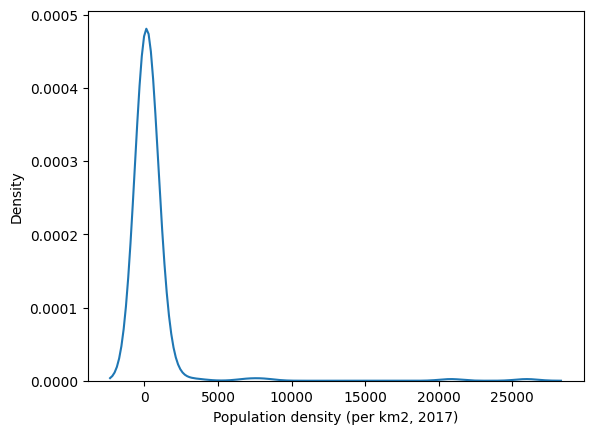

In [56]:
sns.kdeplot(x='Population density (per km2, 2017)',data = df)
plt.show()

Most of the countries have population density less than 5000

**What is the range of the surface area across all countries?**

In [58]:
df['Surface area (km2)'].unique()

array(['652864', '28748', '2381741', '199', '468', '1246700', '91', '442',
       '2780400', '29743', '180', '7692060', '83871', '86600', '13940',
       '771', '147570', '431', '207600', '30528', '22966', '114763', '53',
       '38394', '1098581', '-99', '51209', '582000', '8515767', '151',
       '5765', '111002', '272967', '27830', '4033', '181035', '475650',
       '9984670', '264', '622984', '1284000', '756102', '1106', '30',
       '9600000', '1141748', '2235', '342000', '236', '51100', '56594',
       '109884', '9251', '78868', '120538', '2344858', '42921', '23200',
       '750', '48671', '257217', '1002000', '21041', '28052', '117600',
       '45227', '1104300', '12173', '1393', '18272', '338440', '551500',
       '83534', '4000', '267668', '11295', '69700', '357376', '238537',
       '6', '131957', '2166086', '345', '1705', '549', '108889', '36125',
       '245857', '214969', '27750', '~0', '112492', '93024', '103000',
       '3287263', '1910931', '1628750', '435052', '69797',

In [68]:
df['Surface area (km2)'] = pd.to_numeric(df['Surface area (km2)'], errors='coerce')
df['Surface area (km2)'].replace(-99,np.nan,inplace = True)
df.dropna(subset = ['Surface area (km2)'],inplace = True)

In [66]:
df['Surface area (km2)']

,Surface area (km2)
0,652864.0
1,28748.0
2,2381741.0
3,199.0
4,468.0
...,...
224,142.0
225,266000.0
226,527968.0
227,752612.0


In [67]:
df['Surface area (km2)'].head()

,Surface area (km2)
0,652864.0
1,28748.0
2,2381741.0
3,199.0
4,468.0


In [70]:
range = max(df['Surface area (km2)']) - min(df['Surface area (km2)'])
range

17098244.0

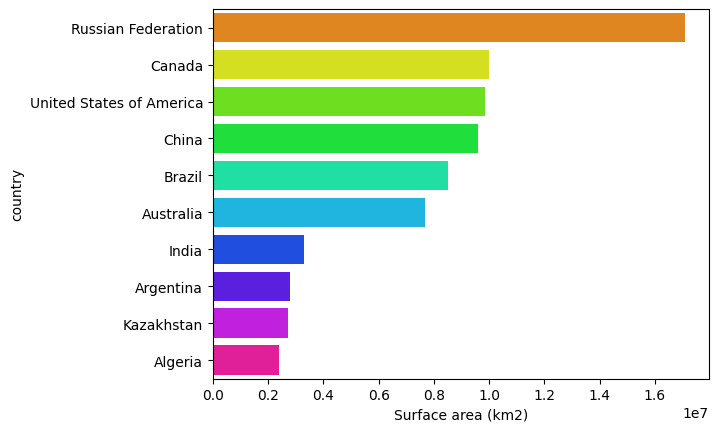

In [73]:
data = df.sort_values(by="Surface area (km2)", ascending=False).head(10)
sns.barplot(x="Surface area (km2)", y="country", data=data, palette="hsv")
plt.show() #Top 10 countries with highest surface areas

**What is the standard deviation of population growth rate?**

In [210]:
df['Population growth rate (average annual %)'].unique()

array(['3.2', '-0.1', '2.0', '-1.6', '3.5', '1.2', '1.1', '1.0', '0.3',
       '0.5', '1.5', '0.6', '1.3', '1.4', '~0.0', '2.2', '2.8', '-0.6',
       '1.6', '-1.0', '1.8', '0.9', '3.0', '2.7', '0.4', '3.3', '2.3',
       '2.4', '2.6', '-1.2', '-0.4', '0.2', '0.1', '1.7', '4.2', '-0.3',
       '0.7', '3.1', '-1.4', '2.1', '4.9', '5.4', '6.0', '0.8', '-1.3',
       '2.9', '1.9', '3.8', '6.5', '-~0.0', '-0.2', '6.6', '2.5', '-2.3',
       '3.4', '-0.5'], dtype=object)

In [211]:
df['Population growth rate (average annual %)'] = pd.to_numeric(df['Population growth rate (average annual %)'], errors='coerce')

In [212]:
df['Population growth rate (average annual %)'].replace(np.nan,0,inplace = True)

In [213]:
df['Population growth rate (average annual %)'].unique()

array([ 3.2, -0.1,  2. , -1.6,  3.5,  1.2,  1.1,  1. ,  0.3,  0.5,  1.5,
        0.6,  1.3,  1.4,  0. ,  2.2,  2.8, -0.6,  1.6, -1. ,  1.8,  0.9,
        3. ,  2.7,  0.4,  3.3,  2.3,  2.4,  2.6, -1.2, -0.4,  0.2,  0.1,
        1.7,  4.2, -0.3,  0.7,  3.1, -1.4,  2.1,  4.9,  5.4,  6. ,  0.8,
       -1.3,  2.9,  1.9,  3.8,  6.5, -0.2,  6.6,  2.5, -2.3,  3.4, -0.5])

In [214]:
statistics.stdev(df['Population growth rate (average annual %)'])

1.3615451798779044

In [217]:
fig = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="Population growth rate (average annual %)",
    color_continuous_scale="viridis",
    title="Population Growth Rate (Average Annual %)"
)
fig.show()

**What is the mean GDP (million current US$) of all countries?**

In [203]:
df['GDP: Gross domestic product (million current US$)'].unique()

array([   20270,    11541,   164779,      -99,     2812,   117955,
            320,     1356,   632343,    10529,     2702,  1230859,
         376967,    53049,     8854,    31126,   194466,     4385,
          54609,   455107,     1721,     8476,     5853,     2074,
          32998,    16251,    14391,  1772591,      908,    12930,
          48953,    11065,     2735,     1603,    18050,    28416,
        1552808,     3726,     1633,    10009,   240796,   309236,
          46178, 11158457,   292080,     1079,     8493,      294,
          52958,    48676,    87206,    19561,   185156,    16283,
          37569,   301308,     1737,      512,    67103,   100177,
         315917,    25850,    13812,     4783,    22460,    59917,
           4391,   231960,  2418946,     5135,    13735,      942,
          13965,  3363600,    37156,   194860,     2078,      954,
          63794,      978,     8875,     3282,     8501,    20365,
         121715,    16780,  2116239,   861934,   398563,   164

In [204]:
df['GDP: Gross domestic product (million current US$)'].replace(-99,np.nan,inplace = True) #-99 is a false value
df.dropna(subset = ['GDP: Gross domestic product (million current US$)'],inplace = True)

In [205]:
statistics.mean(df['GDP: Gross domestic product (million current US$)'])

353896.3413461539

In [207]:
fig = px.choropleth(
    data_frame=df,
    locations="country",
    locationmode="country names",
    color="GDP: Gross domestic product (million current US$)",
    title="GDP of Countries",
    color_continuous_scale="turbo"
)
fig.show()

**What is the interquartile range (IQR) of the GDP per capita (current US$)?**

In [102]:
df['GDP per capita (current US$)'].unique()

array([ 6.232000e+02,  3.984200e+03,  4.154100e+03, -9.900000e+01,
        3.989640e+04,  4.714100e+03,  2.187960e+04,  1.476450e+04,
        1.456450e+04,  3.489100e+03,  2.600540e+04,  5.135220e+04,
        4.411770e+04,  5.438700e+03,  2.281720e+04,  2.260020e+04,
        1.207900e+03,  1.542940e+04,  5.750800e+03,  4.027780e+04,
        4.789400e+03,  7.791000e+02,  9.439990e+04,  2.677100e+03,
        3.076800e+03,  4.265000e+03,  6.360600e+03,  8.528300e+03,
        3.014450e+04,  3.055270e+04,  6.846800e+03,  6.111000e+02,
        2.446000e+02,  3.080200e+03,  1.158700e+03,  1.217300e+03,
        4.320560e+04,  6.213200e+04,  3.332000e+02,  7.130000e+02,
        1.341620e+04,  4.243100e+04,  7.858640e+04,  8.109100e+03,
        6.056100e+03,  1.368900e+03,  1.838100e+03,  1.411870e+04,
        1.101500e+04,  1.147940e+04,  7.656600e+03,  2.194190e+04,
        1.756170e+04,  6.480000e+02,  4.862000e+02,  5.314930e+04,
        1.956300e+03,  7.051100e+03,  6.373600e+03,  6.205100e

In [103]:
df['GDP per capita (current US$)'].replace(-99,np.nan,inplace = True)
df.dropna(subset = ['GDP per capita (current US$)'],inplace = True)

In [104]:
Q1 = df['GDP per capita (current US$)'].quantile(0.25)
Q3 = df['GDP per capita (current US$)'].quantile(0.75)
IQR = Q3 - Q1
IQR

16687.85

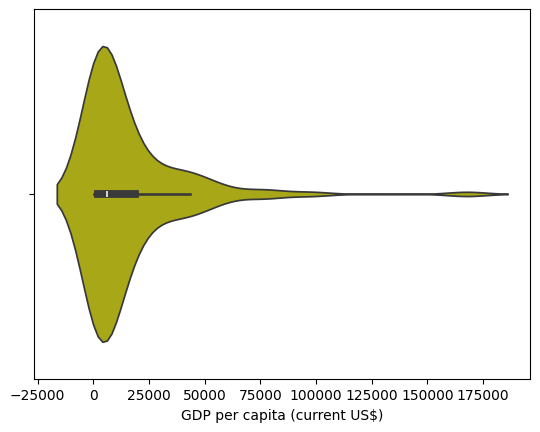

In [107]:
sns.violinplot(x=df['GDP per capita (current US$)'],color = 'y')
plt.show()

**What is the coefficient of variation for GDP growth rate (annual %, constant 2005 prices)?**

In [108]:
df['GDP growth rate (annual %, const. 2005 prices)'].unique()

array(['-2.4', '2.6', '3.8', '0.8', '3.0', '2.9', '4.1', '2.4', '0.1',
       '1.0', '0.7', '-1.7', '6.6', '0.9', '-3.9', '1.5', '1.2', '5.2',
       '0.4', '4.8', '3.1', '-0.3', '-3.8', '-1.1', '-0.6', '-4.1', '7.0',
       '5.8', '2.3', '-20.3', '6.9', '5.5', '3.7', '1.6', '4.4', '1.7',
       '4.5', '6.5', '-1.8', '0.2', '4.2', '2.5', '-7.4', '1.4', '9.6',
       '3.6', '1.3', '3.9', '4.7', '2.8', '-0.2', '0.3', '6.2', '7.6',
       '26.3', '5.6', '1.8', '3.5', '2.7', '-10.2', '5.0', '0.6', '5.4',
       '7.3', '5.3', '18.7', '2.0', '3.2', '4.9', '5.7', '3.3', '5.9',
       '-~0.0', '-0.7', '-3.7', '1.9', '4.0', '3.4', '6.8', '0.5', '-2.7',
       '-5.3', '4.3', '-9.9', '2.2', '-1.0', '-6.2', '6.7', '-28.1',
       '1.1'], dtype=object)

In [109]:
df['GDP growth rate (annual %, const. 2005 prices)'] = pd.to_numeric(df['GDP growth rate (annual %, const. 2005 prices)'], errors='coerce')
df.dropna(subset = ['GDP growth rate (annual %, const. 2005 prices)'],inplace = True)

In [110]:
st = statistics.stdev(df['GDP growth rate (annual %, const. 2005 prices)'])
m = statistics.mean(df['GDP growth rate (annual %, const. 2005 prices)'])

cv = (st/m) *100
cv

188.07294540505842

**Which economic sector (Agriculture, Industry, or Services) has the highest average contribution to GVA?**

In [117]:
x = ['Economy: Agriculture (% of GVA)','Economy: Industry (% of GVA)','Economy: Services and other activity (% of GVA)']
for i in x:
  df[i].replace(-99,np.nan,inplace = True)
  df[i] = pd.to_numeric(df[i], errors='coerce')
  df.dropna(subset = [i],inplace = True)

In [119]:
Averages = df[['Economy: Agriculture (% of GVA)','Economy: Industry (% of GVA)','Economy: Services and other activity (% of GVA)']].mean()
highest_sector = Averages.idxmax()
print(highest_sector)
highest_value = Averages.max()
print(highest_value)

Economy: Services and other activity (% of GVA)
61.086893203883484


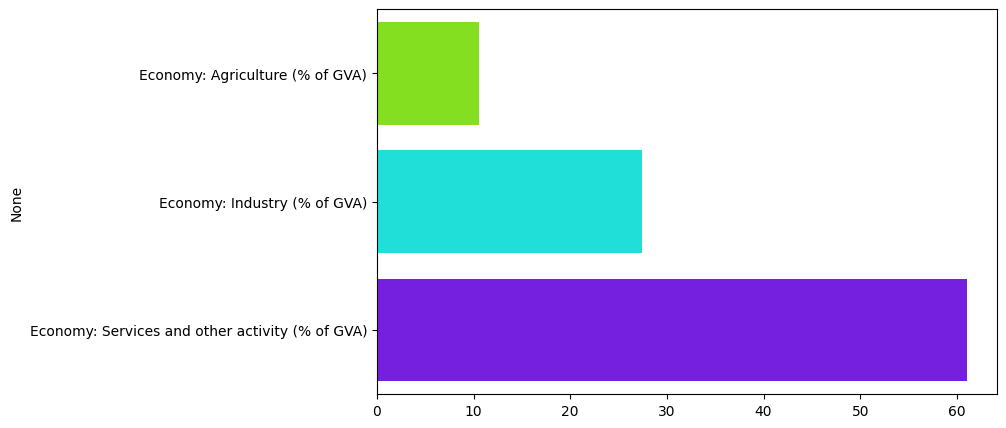

In [123]:
plt.figure(figsize=(8, 5))
sns.barplot(x = Averages.values,y = Averages.index,palette = 'hsv')
plt.show()

In [112]:
df['Economy: Industry (% of GVA)']

,Economy: Industry (% of GVA)
0,23.3
1,26.0
2,37.3
4,10.8
5,51.2
...,...
222,44.7
223,37.0
226,36.9
227,32.3


**What is the mode of the fertility rate (live births per woman) across all countries?**

In [127]:
df['Fertility rate, total (live births per woman)'].unique()

array(['5.3', '1.7', '3.0', '2.6', '1.2', '6.0', '...', '2.1', '2.3',
       '1.6', '1.8', '1.9', '1.4', '2.2', '5.2', '1.5', '-99', '1.3',
       '2.9', '5.6', '2.5', '2.7', '5.0', '5.1', '6.3', '4.6', '4.9',
       '2.0', '6.4', '3.1', '3.4', '4.4', '2.4', '3.5', '4.0', '4.2',
       '3.2', '3.6', '4.1', '3.8', '3.3', '4.8', '2.8', '5.4', '3.9',
       '7.4', '5.7', '3.7', '4.7', '6.6', '5.9'], dtype=object)

In [128]:
df['Fertility rate, total (live births per woman)'] = pd.to_numeric(df['Fertility rate, total (live births per woman)'], errors='coerce')
df['Fertility rate, total (live births per woman)'].replace(-99,np.nan,inplace = True)
df.dropna(subset = ['Fertility rate, total (live births per woman)'],inplace = True)

In [129]:
statistics.mode(df['Fertility rate, total (live births per woman)'])

1.5

**What is the variance of the unemployment rate (% of the labor force)?**

In [130]:
df['Unemployment (% of labour force)'].unique()

array(['8.6', '15.8', '11.4', '...', '-99', '6.6', '6.5', '16.6', '5.5',
       '6.2', '5.2', '14.7', '1.3', '4.0', '11.3', '0.5', '8.3', '11.5',
       '1.0', '6.7', '2.4', '3.8', '25.4', '18.6', '12.4', '2.1', '8.1',
       '2.9', '1.7', '10.5', '0.3', '4.6', '7.1', '6.9', '5.8', '8.7',
       '6.8', '3.5', '3.2', '20.0', '8.2', '11.7', '3.0', '10.3', '3.9',
       '4.3', '3.6', '6.0', '14.4', '6.4', '7.7', '7.3', '7.2', '5.7',
       '8.9', '9.8', '21.3', '17.0', '18.1', '29.7', '4.2', '5.9', '23.0',
       '9.7', '26.1', '10.7', '12.9', '5.6', '4.5', '3.4', '16.1', '7.6',
       '13.1', '13.4', '10.8', '2.2', '1.5', '9.6', '7.0', '27.5', '4.1',
       '19.2', '2.6', '9.2', '2.3', '3.3', '5.4', '4.7', '22.8', '12.0',
       '6.3', '17.4', '10.4', '24.1', '0.8', '24.9', '15.1', '6.1', '2.7',
       '5.1', '17.8', '2.5', '5.3', '12.8', '5.0', '19.0', '19.1', '13.6',
       '9.3', '15.5', '3.1', '2.0', '9.9', '31.4', '26.0', '18.3', '24.2',
       '25.1', '13.8', '0.6', '27.3', '4.8', 

In [131]:
df['Unemployment (% of labour force)'] = df['Unemployment (% of labour force)'].apply(pd.to_numeric,errors = 'coerce')
df['Unemployment (% of labour force)'].replace(-99,np.nan,inplace = True)
df.dropna(subset = ['Unemployment (% of labour force)'],inplace = True)

In [132]:
statistics.variance(df['Unemployment (% of labour force)'])

41.835773852688284

**What percentage of countries have an urban population greater than 50%?**

In [195]:
df['Urban population (% of total population)'].unique()

array([ 26.7,  57.4,  70.7,  87.2,  85.1,  44.1, 100. ,  23.8,  91.8,
        62.7,  41.5,  89.4,  66. ,  54.6,  82.9,  88.8,  34.3,  31.5,
        76.7,  97.9,  44. ,  38.6,  68.5,  74.7,  39.8,  85.7,  46.2,
        77.2,  73.9,  29.9,  12.1,  65.5,  20.7,  54.4,  81.8,  40. ,
        22.5,  89.5,  55.6,  76.4,  28.3,  65.4,  74.5,  76.8,  59. ,
        77.1,  66.9,  73. ,  60.9,  42.5,  87.7,  77.3,  69.5,  79. ,
        63.7,  43.1,  66.7,  39.9,  22.6,  67.5,  19.5,  76.2,  42. ,
        53.7,  84.2,  79.5,  84.4,  55.9,  59.6,  53.6,  75.3,  54. ,
        78. ,  86.4,  35.6,  98.4,  94.5,  51.6,  49.3,  37.2,  28.6,
        58.6,  54.7,  71.2,  94.1,  32.7,  73.4,  63.2,  52.2,  92.1,
        69. ,  54.8,  93.5,  83.7,  53.2,  25.6,  44.3,  98.3,  35.7,
        67.4,  87.8,  27.3,  49.7,  78.6,  14.3,  66.5,  90.2,  35.1,
        16.3,  45.5,  95.4,  72.7,  88.9,  59.9,  39.7,  47. ,  79.2,
        22.4,  72. ,  64. ,   9. ,  60.2,  32.2,  34.1,  46.7,  18.6,
        90.5,  70.2,

In [196]:
urban = (df['Urban population (% of total population)'] > 50).mean()*100

In [197]:
y = len(df['Urban population (% of total population)'])
x = len(df[df['Urban population (% of total population)'] > 50])
x/y *100  #Manual calculation of mean value

62.882096069869

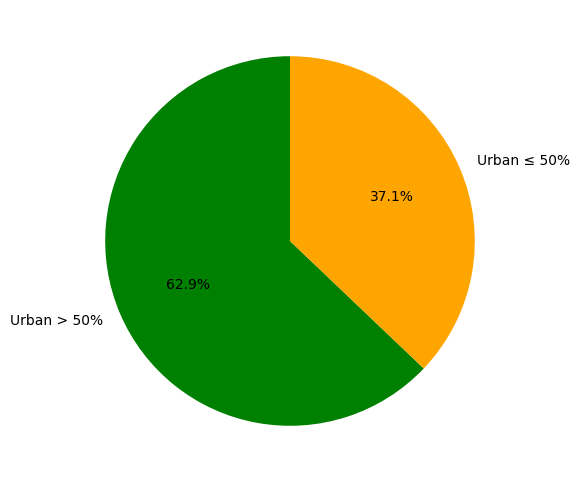

In [201]:
total_countries = len(df['Urban population (% of total population)'])
urban_countries = df[df['Urban population (% of total population)'] > 50].shape[0]

rural = 100 - urban

plt.figure(figsize=(6, 6))
plt.pie([urban, rural],labels=['Urban > 50%', 'Urban ≤ 50%'],autopct='%1.1f%%',colors=['green', 'orange'],startangle=90)
plt.show()

**What is the correlation between GDP per capita and life expectancy?**

In [ ]:
df['Life expectancy at birth (females/males, years)']

,"Life expectancy at birth (females/males, years)"
0,63.5/61.0
1,79.9/75.6
2,76.5/74.1
3,77.8/71.1
4,-99
...,...
224,78.7/72.8
225,70.3/66.9
226,65.6/62.8
227,61.9/57.5


In [179]:
df['Life expectancy at birth (females/males, years)'].unique()

array(['63.5/61.0', '79.9/75.6', '76.5/74.1', '-99', '63.0/57.4',
       '.../...', '79.8/72.2', '77.0/70.6', '77.8/72.9', '84.4/80.2',
       '83.5/78.4', '74.6/68.6', '78.1/72.0', '77.5/75.6', '72.9/69.8',
       '77.7/72.9', '77.7/66.5', '83.0/78.0', '72.7/67.2', '61.4/58.5',
       '85.1/77.5', '68.9/68.6', '70.2/65.3', '78.8/73.7', '66.1/59.8',
       '78.4/71.0', '78.4/75.1', '77.8/70.8', '59.3/58.0', '58.0/54.2',
       '74.0/70.1', '69.6/65.5', '57.7/55.1', '83.8/79.7', '51.0/47.8',
       '52.8/50.5', '81.3/76.2', '86.2/80.3', '77.2/74.2', '77.4/70.2',
       '64.5/61.2', '64.1/61.0', '81.7/76.7', '80.4/73.6', '81.3/77.1',
       '82.2/77.7', '81.2/75.1', '74.1/67.2', '59.5/56.7', '82.2/78.1',
       '63.2/60.0', '76.4/70.2', '78.4/72.8', '73.0/68.7', '77.1/67.9',
       '58.4/55.5', '65.6/61.4', '81.2/71.8', '65.5/61.9', '84.5/78.3',
       '72.9/66.9', '83.7/77.7', '85.0/78.8', '82.6/76.1', '78.6/74.0',
       '65.8/63.1', '61.6/59.1', '77.0/68.5', '82.9/77.9', '62.6/60.7',


In [180]:
df['Life expectancy at birth (females/males, years)'] = df['Life expectancy at birth (females/males, years)'].replace(['.../...','-99'],np.nan)

In [181]:
df.dropna(subset = ['Life expectancy at birth (females/males, years)'],inplace=True)

Separate both the male female data and finding the average country wise

In [182]:
df['Life expectancy at birth (females/males, years)'] = df['Life expectancy at birth (females/males, years)'].apply(lambda x: (sum(map(float,x.split('/')))/2) if isinstance(x,str) and '/' in x else float(x))

In [183]:
df['Life expectancy at birth (females/males, years)'] #mean of both values

,"Life expectancy at birth (females/males, years)"
0,62.25
1,77.75
2,75.30
5,60.20
8,76.00
...,...
222,74.05
223,75.50
226,64.20
227,59.70


Now working on GDP per capita column

In [184]:
df['GDP per capita (current US$)'].unique()

array([ 6.232000e+02,  3.984200e+03,  4.154100e+03,  4.714100e+03,
        1.456450e+04,  3.489100e+03,  2.600540e+04,  5.135220e+04,
        4.411770e+04,  5.438700e+03,  2.281720e+04,  2.260020e+04,
        1.207900e+03,  1.542940e+04,  5.750800e+03,  4.027780e+04,
        4.789400e+03,  7.791000e+02,  9.439990e+04,  2.677100e+03,
        3.076800e+03,  4.265000e+03,  6.360600e+03,  8.528300e+03,
        3.055270e+04,  6.846800e+03,  6.111000e+02,  2.446000e+02,
        3.080200e+03,  1.158700e+03,  1.217300e+03,  4.320560e+04,
        3.332000e+02,  7.130000e+02,  1.341620e+04,  7.858640e+04,
        8.109100e+03,  6.056100e+03,  1.368900e+03,  1.838100e+03,
        1.101500e+04,  1.147940e+04,  7.656600e+03,  2.194190e+04,
        1.756170e+04,  6.480000e+02,  4.862000e+02,  5.314930e+04,
        1.956300e+03,  6.373600e+03,  6.205100e+03,  3.452300e+03,
        4.219400e+03,  1.634410e+04,  9.149000e+02,  1.711200e+04,
        6.028000e+02, -9.900000e+01,  4.921900e+03,  4.214810e

In [185]:
df['GDP per capita (current US$)'] = df['GDP per capita (current US$)'].replace(-99,np.nan)
df.dropna(subset = ['GDP per capita (current US$)'],inplace=True)

In [186]:
df['GDP per capita (current US$)'].corr(df['Life expectancy at birth (females/males, years)']) #positive correlation

0.6181597957673187

In [187]:
df['GDP per capita (current US$)'].dtype

dtype('float64')

In [188]:
df['Life expectancy at birth (females/males, years)'].dtype

dtype('float64')

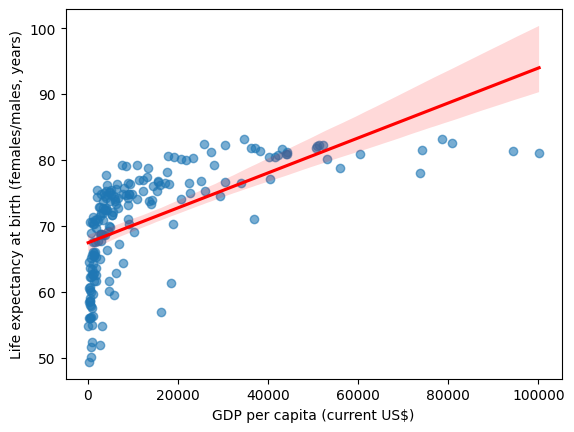

In [189]:
sns.regplot(x=df['GDP per capita (current US$)'], y=df['Life expectancy at birth (females/males, years)'], scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.show()

**What is the minimum and maximum number of threatened species reported?**

In [150]:
df['Threatened species (number)'].unique()

array(['2.1', '28.2', '0.8', '46.5', '22.3', '10.0', '11.7', '2.3',
       '16.2', '46.9', '13.5', '51.4', '11.0', '14.7', '42.5', '22.6',
       '60.1', '38.7', '20.0', '72.0', '50.8', '42.7', '19.3', '59.2',
       '72.1', '35.1', '19.8', '10.6', '22.1', '54.3', '40.3', '38.2',
       '35.6', '4.0', '23.4', '-99', '22.0', '52.8', '20.1', '65.4',
       '62.9', '53.4', '34.3', '30.2', '18.7', '34.5', '42.8', '67.4',
       '14.4', '0.2', '40.4', '0.1', '13.0', '56.3', '15.0', '52.7',
       '12.5', '55.4', '73.1', '30.8', '42.3', '88.5', '48.1', '40.6',
       '32.7', '40.9', '31.2', '~0.0', '50.0', '33.4', '70.5', '26.0',
       '84.0', '3.5', '42.1', '22.8', '0.5', '23.7', '50.6', '6.6', '1.9',
       '10.9', '7.5', '31.4', '31.0', '68.5', '1.1', '1.2', '7.7', '0.4',
       '3.4', '80.5', '54.0', '13.4', '1.6', '43.7', '34.8', '33.5',
       '21.5', '33.6', '67.5', '3.3', '3.9', '70.2', '19.0', '34.0',
       '91.8', '8.1', '61.5', '12.6', '48.5', '45.3', '8.5', '0.0',
       '25.4'

In [151]:
df['Threatened species (number)'] = pd.to_numeric(df['Threatened species (number)'], errors='coerce')
df['Threatened species (number)'].replace(-99,np.nan,inplace = True)
df.dropna(subset = ['Threatened species (number)'],inplace = True)

In [152]:
min_threatened_species = min(df['Threatened species (number)'])
max_threatened_species = max(df['Threatened species (number)'])

In [153]:
print(min_threatened_species)
print(max_threatened_species)

0.0
98.3


In [162]:
fig = px.choropleth(
    data_frame=df,
    locations="country",
    locationmode="country names",
    color="Threatened species (number)",
    title="Countries with threatened species",
    color_continuous_scale="plasma"
)
fig.show()

**What proportion of countries have a labor force participation rate above 60%?**

In [190]:
df['Labour force participation (female/male pop. %)'].unique()

array(['19.3/83.6', '40.2/61.0', '17.0/70.7', '59.8/77.1', '48.6/74.4',
       '55.3/74.2', '58.8/69.6', '58.4/70.7', '54.6/65.8', '62.0/68.8',
       '69.4/79.1', '38.5/84.9', '43.2/81.1', '61.8/70.0', '54.0/67.8',
       '48.1/58.9', '56.7/83.8', '70.0/73.4', '72.6/80.0', '59.4/73.5',
       '64.1/82.6', '34.3/57.5', '73.6/81.6', '56.0/78.2', '50.6/75.0',
       '48.5/60.1', '76.5/90.5', '84.6/82.7', '53.7/84.6', '75.6/87.0',
       '71.1/81.2', '60.7/69.9', '71.9/84.6', '64.0/79.3', '50.7/74.7',
       '65.6/76.4', '63.0/77.7', '58.0/79.8', '35.7/79.5', '67.1/72.6',
       '46.9/76.5', '46.3/58.4', '42.1/68.3', '57.8/70.4', '51.3/67.8',
       '73.6/85.9', '70.4/71.8', '58.1/66.0', '36.5/68.5', '52.3/78.6',
       '49.1/79.9', '23.1/76.2', '49.5/79.5', '71.5/91.8', '77.8/90.1',
       '55.4/69.4', '77.1/89.1', '37.0/71.2', '54.5/61.7', '50.3/59.4',
       '46.4/63.0', '40.7/58.3', '72.2/82.6', '57.9/79.0', '54.5/66.1',
       '75.7/78.8', '44.1/60.1', '-99', '41.7/84.0', '67.4/78.5'

In [191]:
df['Labour force participation (female/male pop. %)'] = df['Labour force participation (female/male pop. %)'].replace(['-99','.../...'],np.nan)
df.dropna(subset = ['Labour force participation (female/male pop. %)'],inplace=True)
df['Labour force participation (female/male pop. %)'] = df['Labour force participation (female/male pop. %)'].apply(lambda x: (sum(map(float,x.split('/')))/2) if isinstance(x,str) and '/' in x else float(x))
(df['Labour force participation (female/male pop. %)'] > 60).mean()*100

65.05376344086021

In [193]:
fig = px.choropleth(
    data_frame=df,
    locations="country",
    locationmode="country names",
    color="Labour force participation (female/male pop. %)",
    title="Average Labour Force Participation of Countries",
    color_continuous_scale="plasma"
)
fig.show()

**Which region has the highest median CO₂ emissions per capita?**

In [167]:
df['Region'].unique()

array(['SouthernAsia', 'SouthernEurope', 'NorthernAfrica', 'Polynesia',
       'MiddleAfrica', 'Caribbean', 'SouthAmerica', 'WesternAsia',
       'Oceania', 'WesternEurope', 'EasternEurope', 'CentralAmerica',
       'WesternAfrica', 'NorthernAmerica', 'SouthernAfrica',
       'South-easternAsia', 'EasternAfrica', 'NorthernEurope',
       'EasternAsia', 'Melanesia', 'Micronesia', 'CentralAsia'],
      dtype=object)

In [168]:
df['CO2 emission estimates (million tons/tons per capita)'].unique()

array([    63,     84,   5900,    -99,      1,   3902,      0,   3167,
           48,  15282,    505,   2459,    961,   1438,      2,    155,
          520,      9,     96,     75,    962,    252,     47,  10948,
          679,    474,    123,     56,    178,    408,  19276,     19,
          288,    540, 101394,   5380,      3,    648,    110,    182,
          212,      5,   1221,    871,   1179,    666,     28,   1247,
         3509,     86,    841,     27,    242,   1308,      8,    757,
         5694,    559,      7,     61,   5004,    410,    368,    327,
           25,    113,    136,    105,    423,    284,  23103,  19481,
        13291,   6744,    313,   1539,   1114,   7091,    750,   6941,
           80,     72,    108,     31,     73,   1505,     74,      6,
          129,     89,   3738,     55,     10,   8514,    677,     29,
           78,    779,   1078,    451,   2447,    783,     91,    101,
        10851,   8204,   3101,   2202,    114,    325,   1020,    991,
      

In [169]:
df['CO2 emission estimates (million tons/tons per capita)'].replace(-99,np.nan,inplace = True)
df.dropna(subset = ['CO2 emission estimates (million tons/tons per capita)'],inplace = True)

In [173]:
df.groupby('Region')['CO2 emission estimates (million tons/tons per capita)'].median()

,CO2 emission estimates (million tons/tons per capita)
Region,
Caribbean,0.5
CentralAmerica,98.0
CentralAsia,2339.0
EasternAfrica,129.0
EasternAsia,992.5
EasternEurope,791.5
Melanesia,3.0
Micronesia,0.0
MiddleAfrica,559.0


In [170]:
df.groupby('Region')['CO2 emission estimates (million tons/tons per capita)'].median().idxmax() #index of max value

'Oceania'

**Which country has the highest proportion of international migrants (% of total population)?**

In [ ]:
df['International migrant stock (000/% of total pop.)'].unique()

array(['382.4/1.2', '57.6/2.0', '242.4/0.6', '42.1/59.7', '106.8/0.4',
       '2086.3/4.8', '191.2/6.3', '6763.7/28.2', '1492.4/17.5',
       '264.2/2.7', '59.3/15.3', '704.1/51.1', '1422.8/0.9', '34.5/12.1',
       '1082.9/11.4', '1387.9/12.3', '53.9/15.0', '245.4/2.3',
       '19.1/30.8', '51.1/6.6', '143.0/1.3', '13.0/52.3', '34.8/0.9',
       '160.6/7.1', '713.6/0.3', '102.7/24.3', '102.1/1.4', '704.7/3.9',
       '286.8/2.6', '14.9/2.9', '74.0/0.5', '382.0/1.6', '7835.5/21.8',
       '81.6/1.7', '517.0/3.7', '82.3/50.3', '469.4/2.6', '2838.7/38.9',
       '342.7/58.3', '978.0/0.1', '133.1/0.3', '12.6/1.6', '393.0/8.5',
       '4.2/19.9', '421.7/8.8', '576.9/13.6', '13.3/0.1', '196.2/16.8',
       '405.1/3.8', '48.5/0.2', '545.7/0.7', '572.5/10.1', '112.4/12.7',
       '415.6/3.9', '387.5/2.4', '491.6/0.5', '42.0/0.7', '10.8/1.3',
       '15.9/0.3', '202.3/15.4', '1072.9/1.1', '1.6/54.1', '5.5/11.4',
       '13.8/1.5', '315.9/5.7', '7784.4/12.1', '106.1/39.5', '30.1/10.6',
       '

In [174]:
df['International migrant stock (000/% of total pop.)'] = df['International migrant stock (000/% of total pop.)'].replace(['-99','.../...'],np.nan)
df.dropna(subset = ['International migrant stock (000/% of total pop.)'],inplace=True)
df['International migrant stock (000/% of total pop.)'] = df['International migrant stock (000/% of total pop.)'] = df['International migrant stock (000/% of total pop.)'].apply(lambda x: (sum(map(float,x.split('/')))/2) if isinstance(x,str) and '/' in x else float(x))

In [175]:
df.groupby('country')['International migrant stock (000/% of total pop.)'].mean().idxmax()

'United States of America'